## Canny Edge Detection
***

O Canny Edge Detector é indiscutivelmente o detector de borda mais conhecido e o mais usado em toda a visão computacional e processamento de imagem. Enquanto o detector Canny Edge não é exatamente "trivial" para entender, tentaremos simplificar aqui para você.

O Canny Edge Detector é um algoritmo de vários passos usado para detectar uma ampla gama de bordas nas imagens. O algoritmo foi introduzido por John F. Canny em seu artigo de 1986, A Computational Approach To Edge Detection. Em qualquer projeto de processamento de imagem, provavelmente verá o detector de borda Canny sendo chamado em algum lugar no código-fonte.  Enquanto  os  gradientes  de  imagem  tendem  a  ser  blocos  de  construção importantes para técnicas mais avançadas, como o detector de borda Canny, o detector de borda Canny também é um bloco de construção para métodos como a detecção de objetos em imagens. Se estamos encontrando a distância da nossa câmera para um objeto, construindo um scanner de documentos móveis ou encontrando uma tela do Game Boy em uma imagem, o detector de borda Canny será frequentemente usado como um passo de pré-processamento importante.

Mais formalmente, uma borda é definida como “descontinuidades na intensidade de pixel”, ou mais simplesmente, uma diferença acentuada e mudança nos valores de pixel.

O Canny  Edge Detector também  usa  o  conceito  de  gradientes  como  no  detector  de borda de Sobel, mas em Sobel consideramos apenas a magnitude do gradiente. Este algoritmo tem quatro etapas principais:

1. **Suavização (Smoothing)**: nesta etapa, o filtro gaussiano é aplicado para reduzir o ruído na  imagem. Isso faz  sentido  no  contexto  da  detecção  de  borda - não  estamos interessados no detalhe real da imagem. Em vez disso, queremos aplicar uma detecção de  borda  para  encontrar  a  estrutura  e  o  esboço  dos  objetos  na  imagem  para  que possamos processá-los. Resumindo, remove os ruidos da imagem.


2. **Encontrando  o  gradiente**: depois de remover o ruído, o próximo passo é encontrar a magnitude e a orientação do gradiente, calculando a derivada x e a derivada y. A direção é  importante,  pois  o  gradiente  é  sempre  perpendicular  à  borda.  Portanto,  se conhecemos a direção do gradiente, também podemos encontrar a direção das bordas. No entanto, como vimos, a magnitude do gradiente é bastante suscetível ao ruído e não é o melhor detector de borda. Precisamos adicionar mais duas etapas para o processo a fim de extrair bordas melhores.


3. **Nonmaximal suppression**: nesta etapa, verificamos se o gradiente calculado é o máximo entre os pontos vizinhos situados na direção positiva e negativa do gradiente; ou seja, se é o máximo local na direção do gradiente. Se não é o máximo local, então esse ponto não faz parte de uma borda. Na figura a seguir, o ponto (x2, y2) é o máximo local, já que esse ponto tem a maior alteração nos valores de pixels e faz parte da borda, enquanto os outros dois pontos na linha não apresentam uma grande alteração nos valores de pixel e não são os máximos locais. Resumindo, calcula se o gradiente que foi calculado é o máximo entre os pontos vizinhos situados nas posições positivas e negativas do gradiente.

![img](https://user-images.githubusercontent.com/14116020/64581909-3d499900-d362-11e9-8e7d-06911c87c012.png)

4. **Thresholding**: neste algoritmo, usamos dois valores de limiar - o limite alto e o limite baixo, ao contrário de Sobel, onde usamos apenas um valor de limiar. Isso é chamado de hysteresis thresholding.  Vamos  entender  como  isso  funciona.  Selecionamos  todos  os pontos de borda, que estão acima do limite alto e então vemos se há vizinhos desses pontos que estão abaixo do limite alto, mas acima do limite baixo; então esses vizinhos também  serão  parte  dessa borda.  Mas  se  todos  os  pontos  de  uma  borda  estiverem abaixo do limite alto, esses pontos não serão selecionados. Resumindo, define um limite para que dentro desse limite ele possa detectar as bordas.

***

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import cv2

def show(img):
    """
    Redimensionar a imagem e mostrar no codigo.
    """

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.rcParams['figure.figsize'] = (50, 50)
    plt.imshow(img)
    plt.axis("off")
    plt.show()

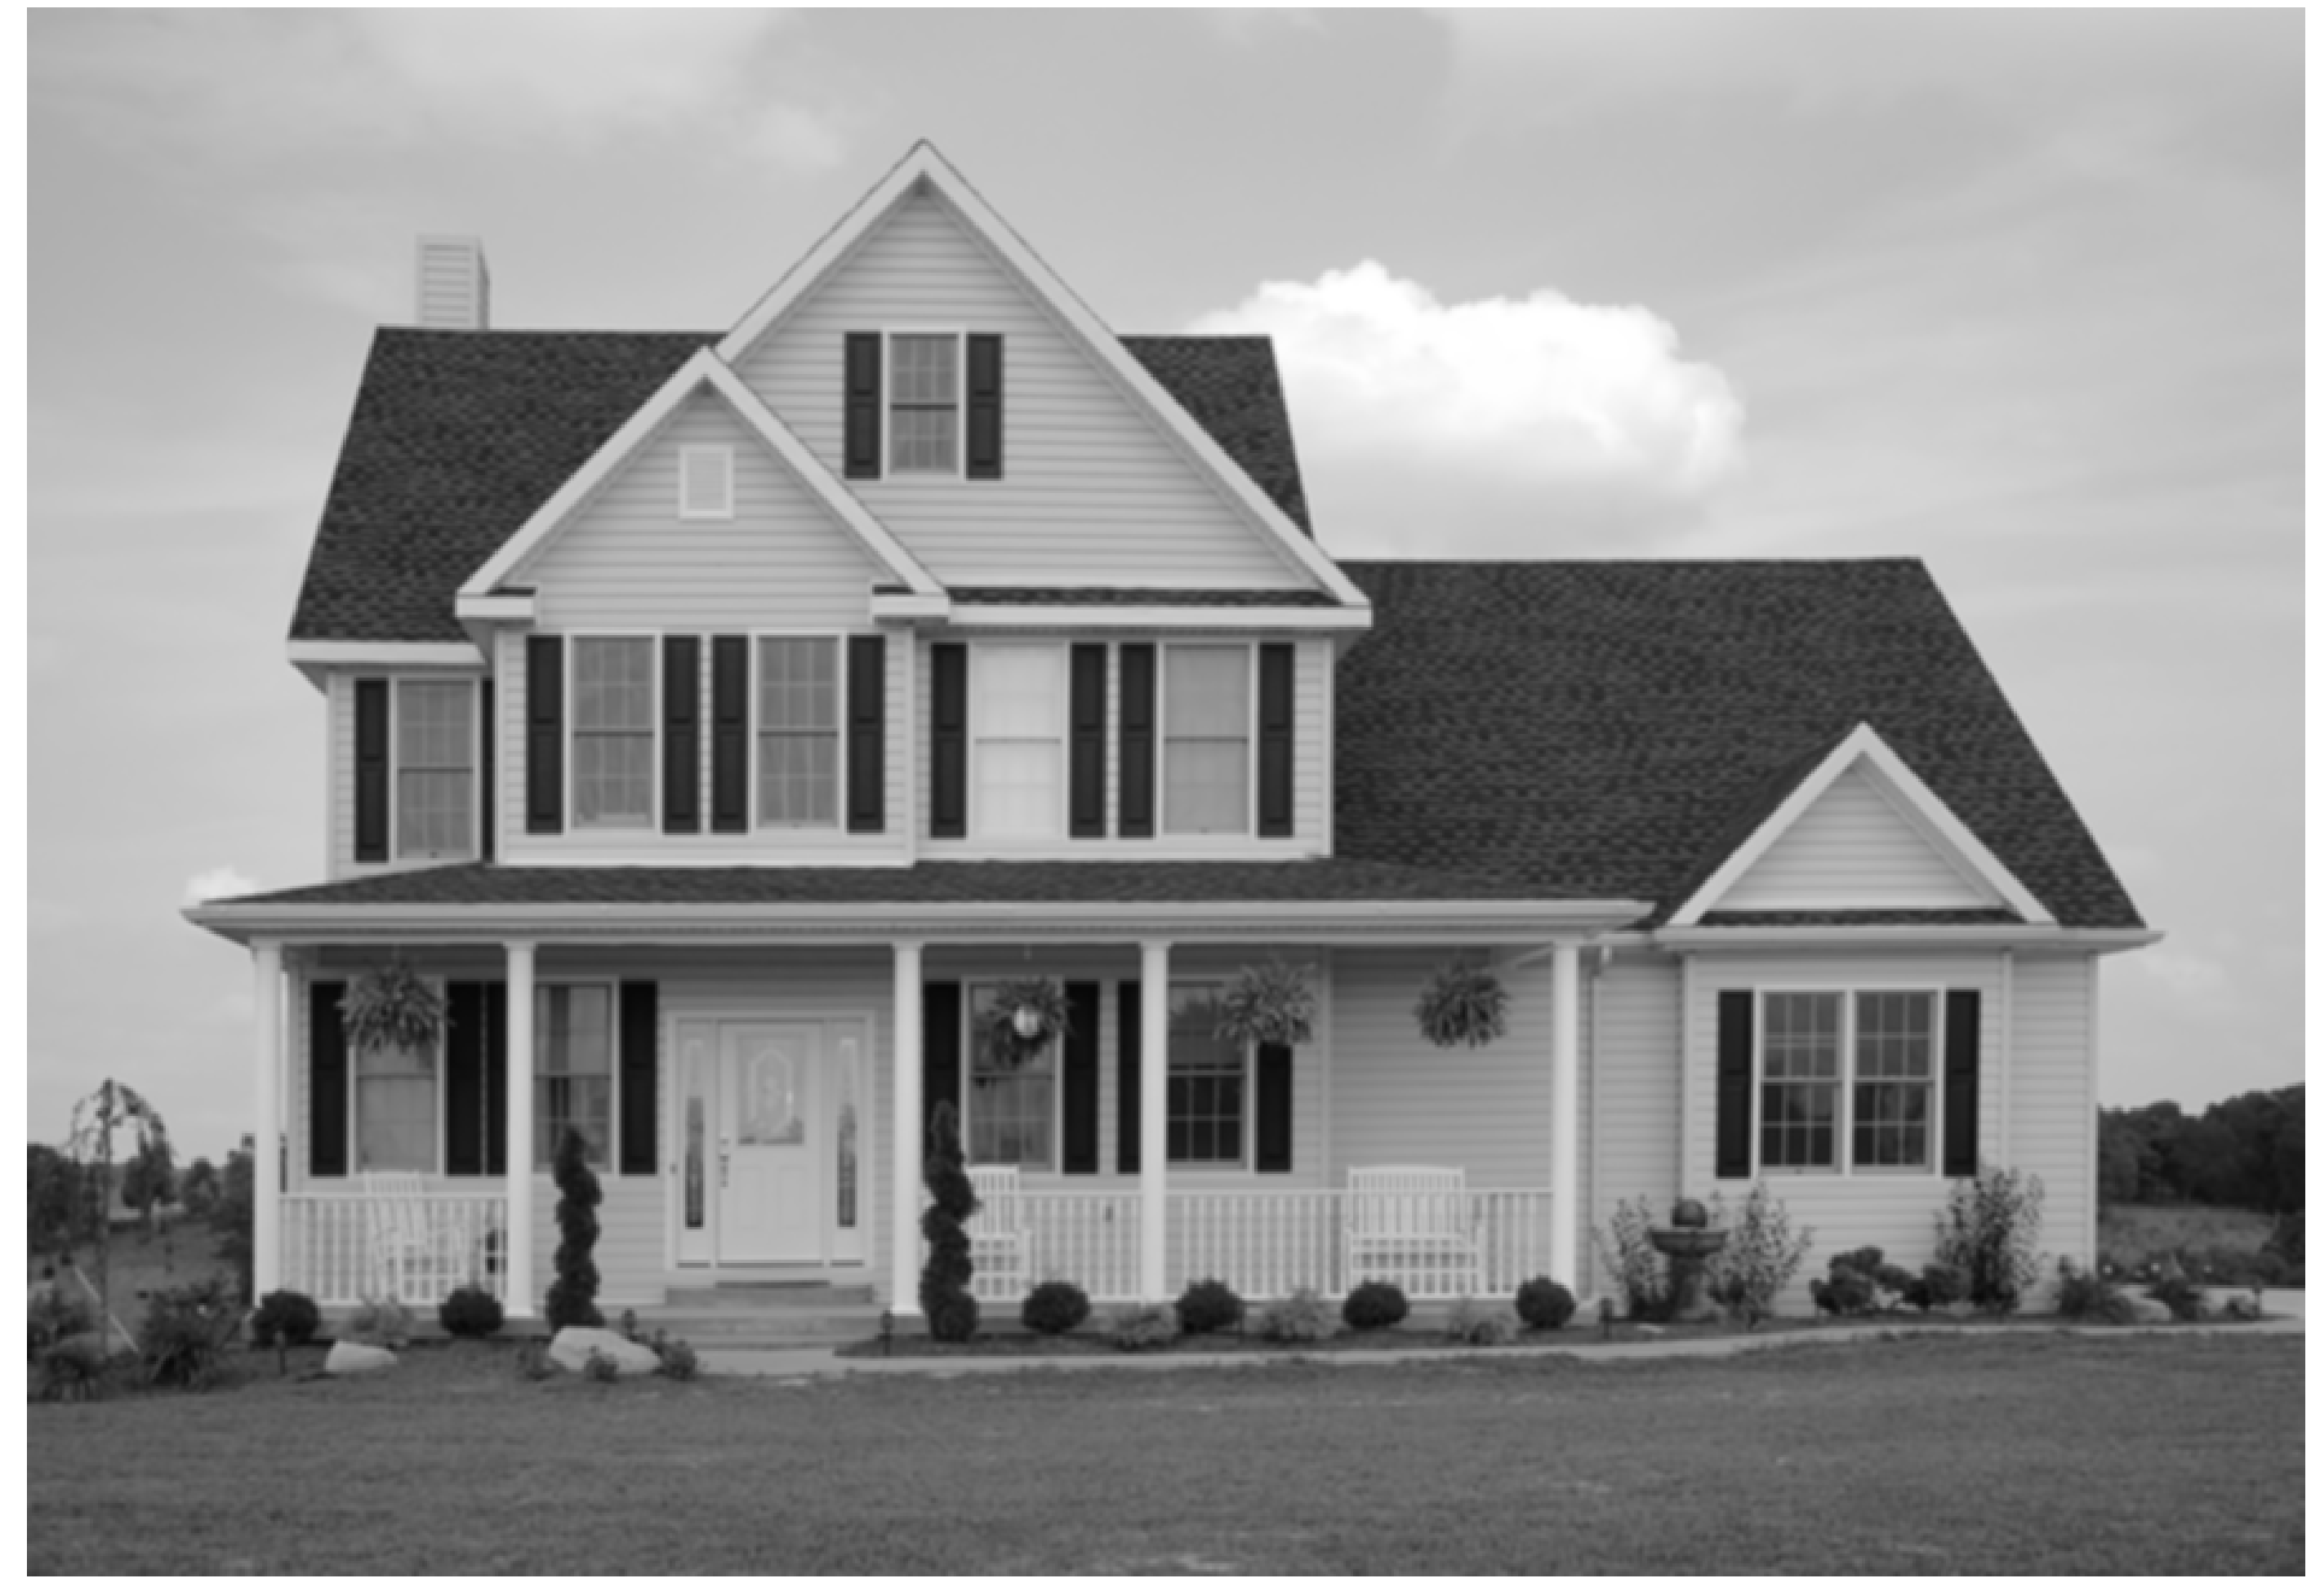

In [2]:
# Carregando a imagem e convertendo para escala de cinza
image = cv2.imread("imagens/casa.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
show(blurred)

In [3]:
# Calcula um limite "largo", "médio" e "curto" para as bordas
wide = cv2.Canny(blurred, 10, 200)
mid = cv2.Canny(blurred, 30, 150)
tight = cv2.Canny(blurred, 240, 250)

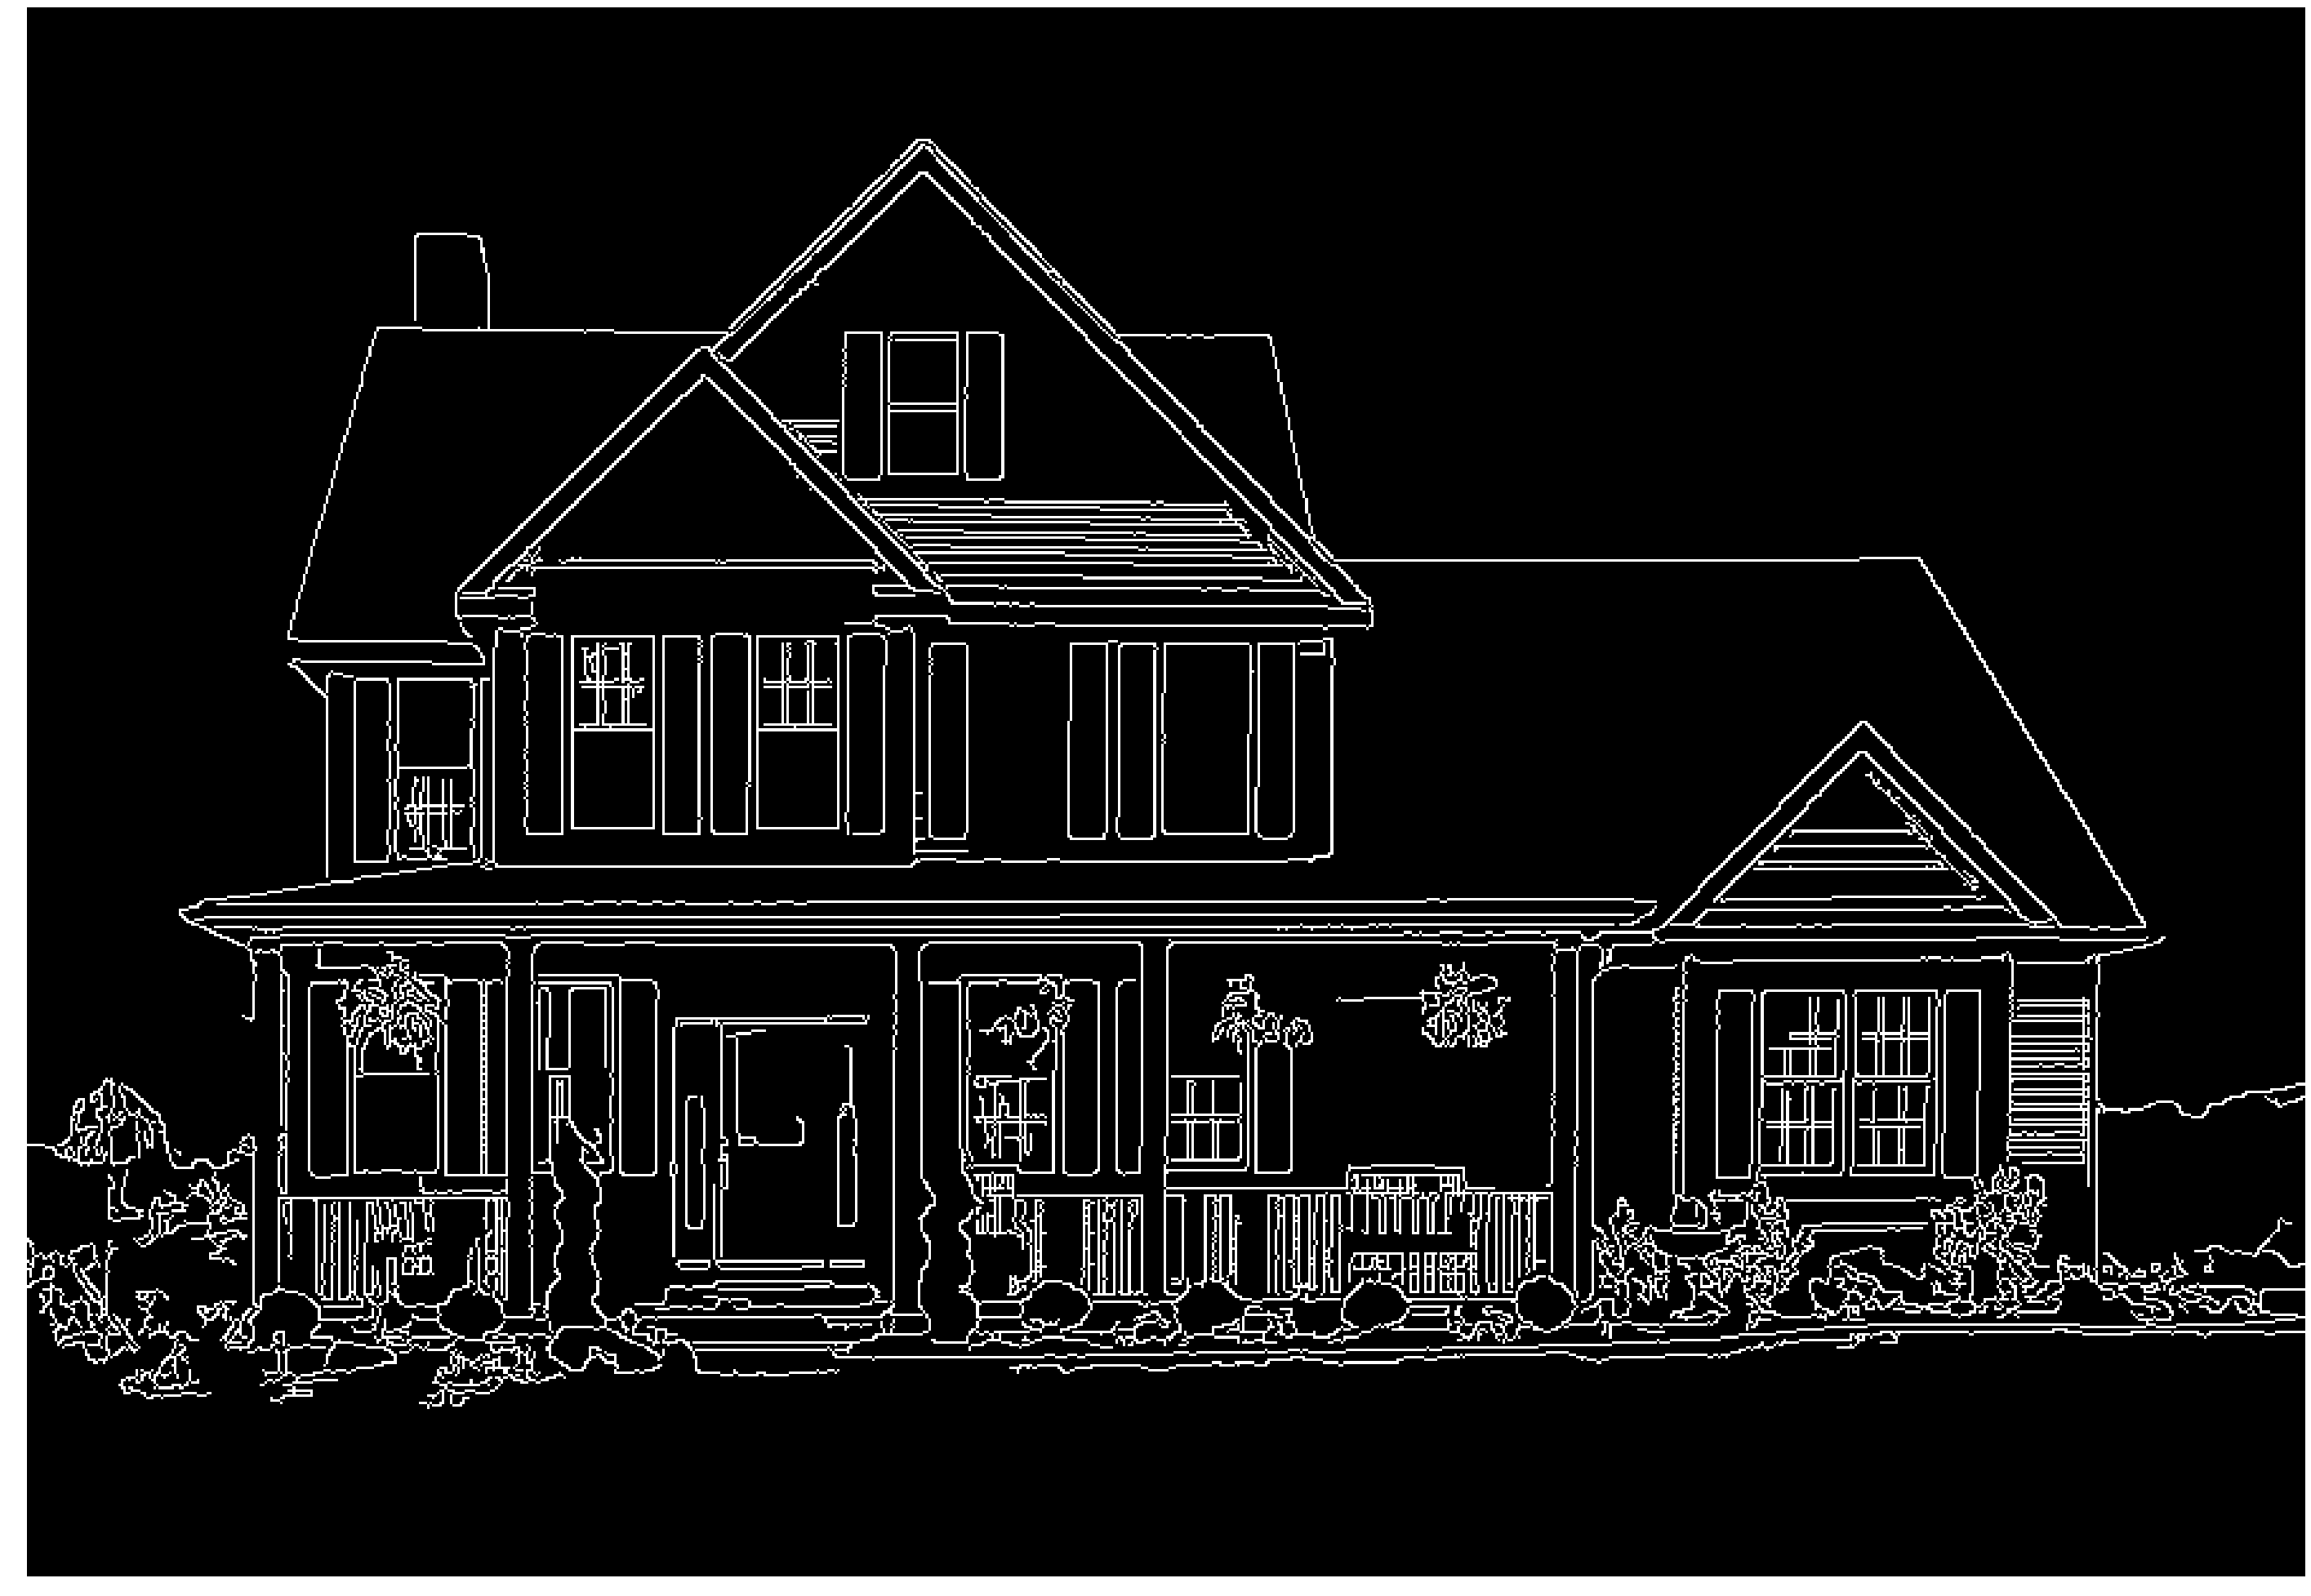

In [4]:
show(wide)

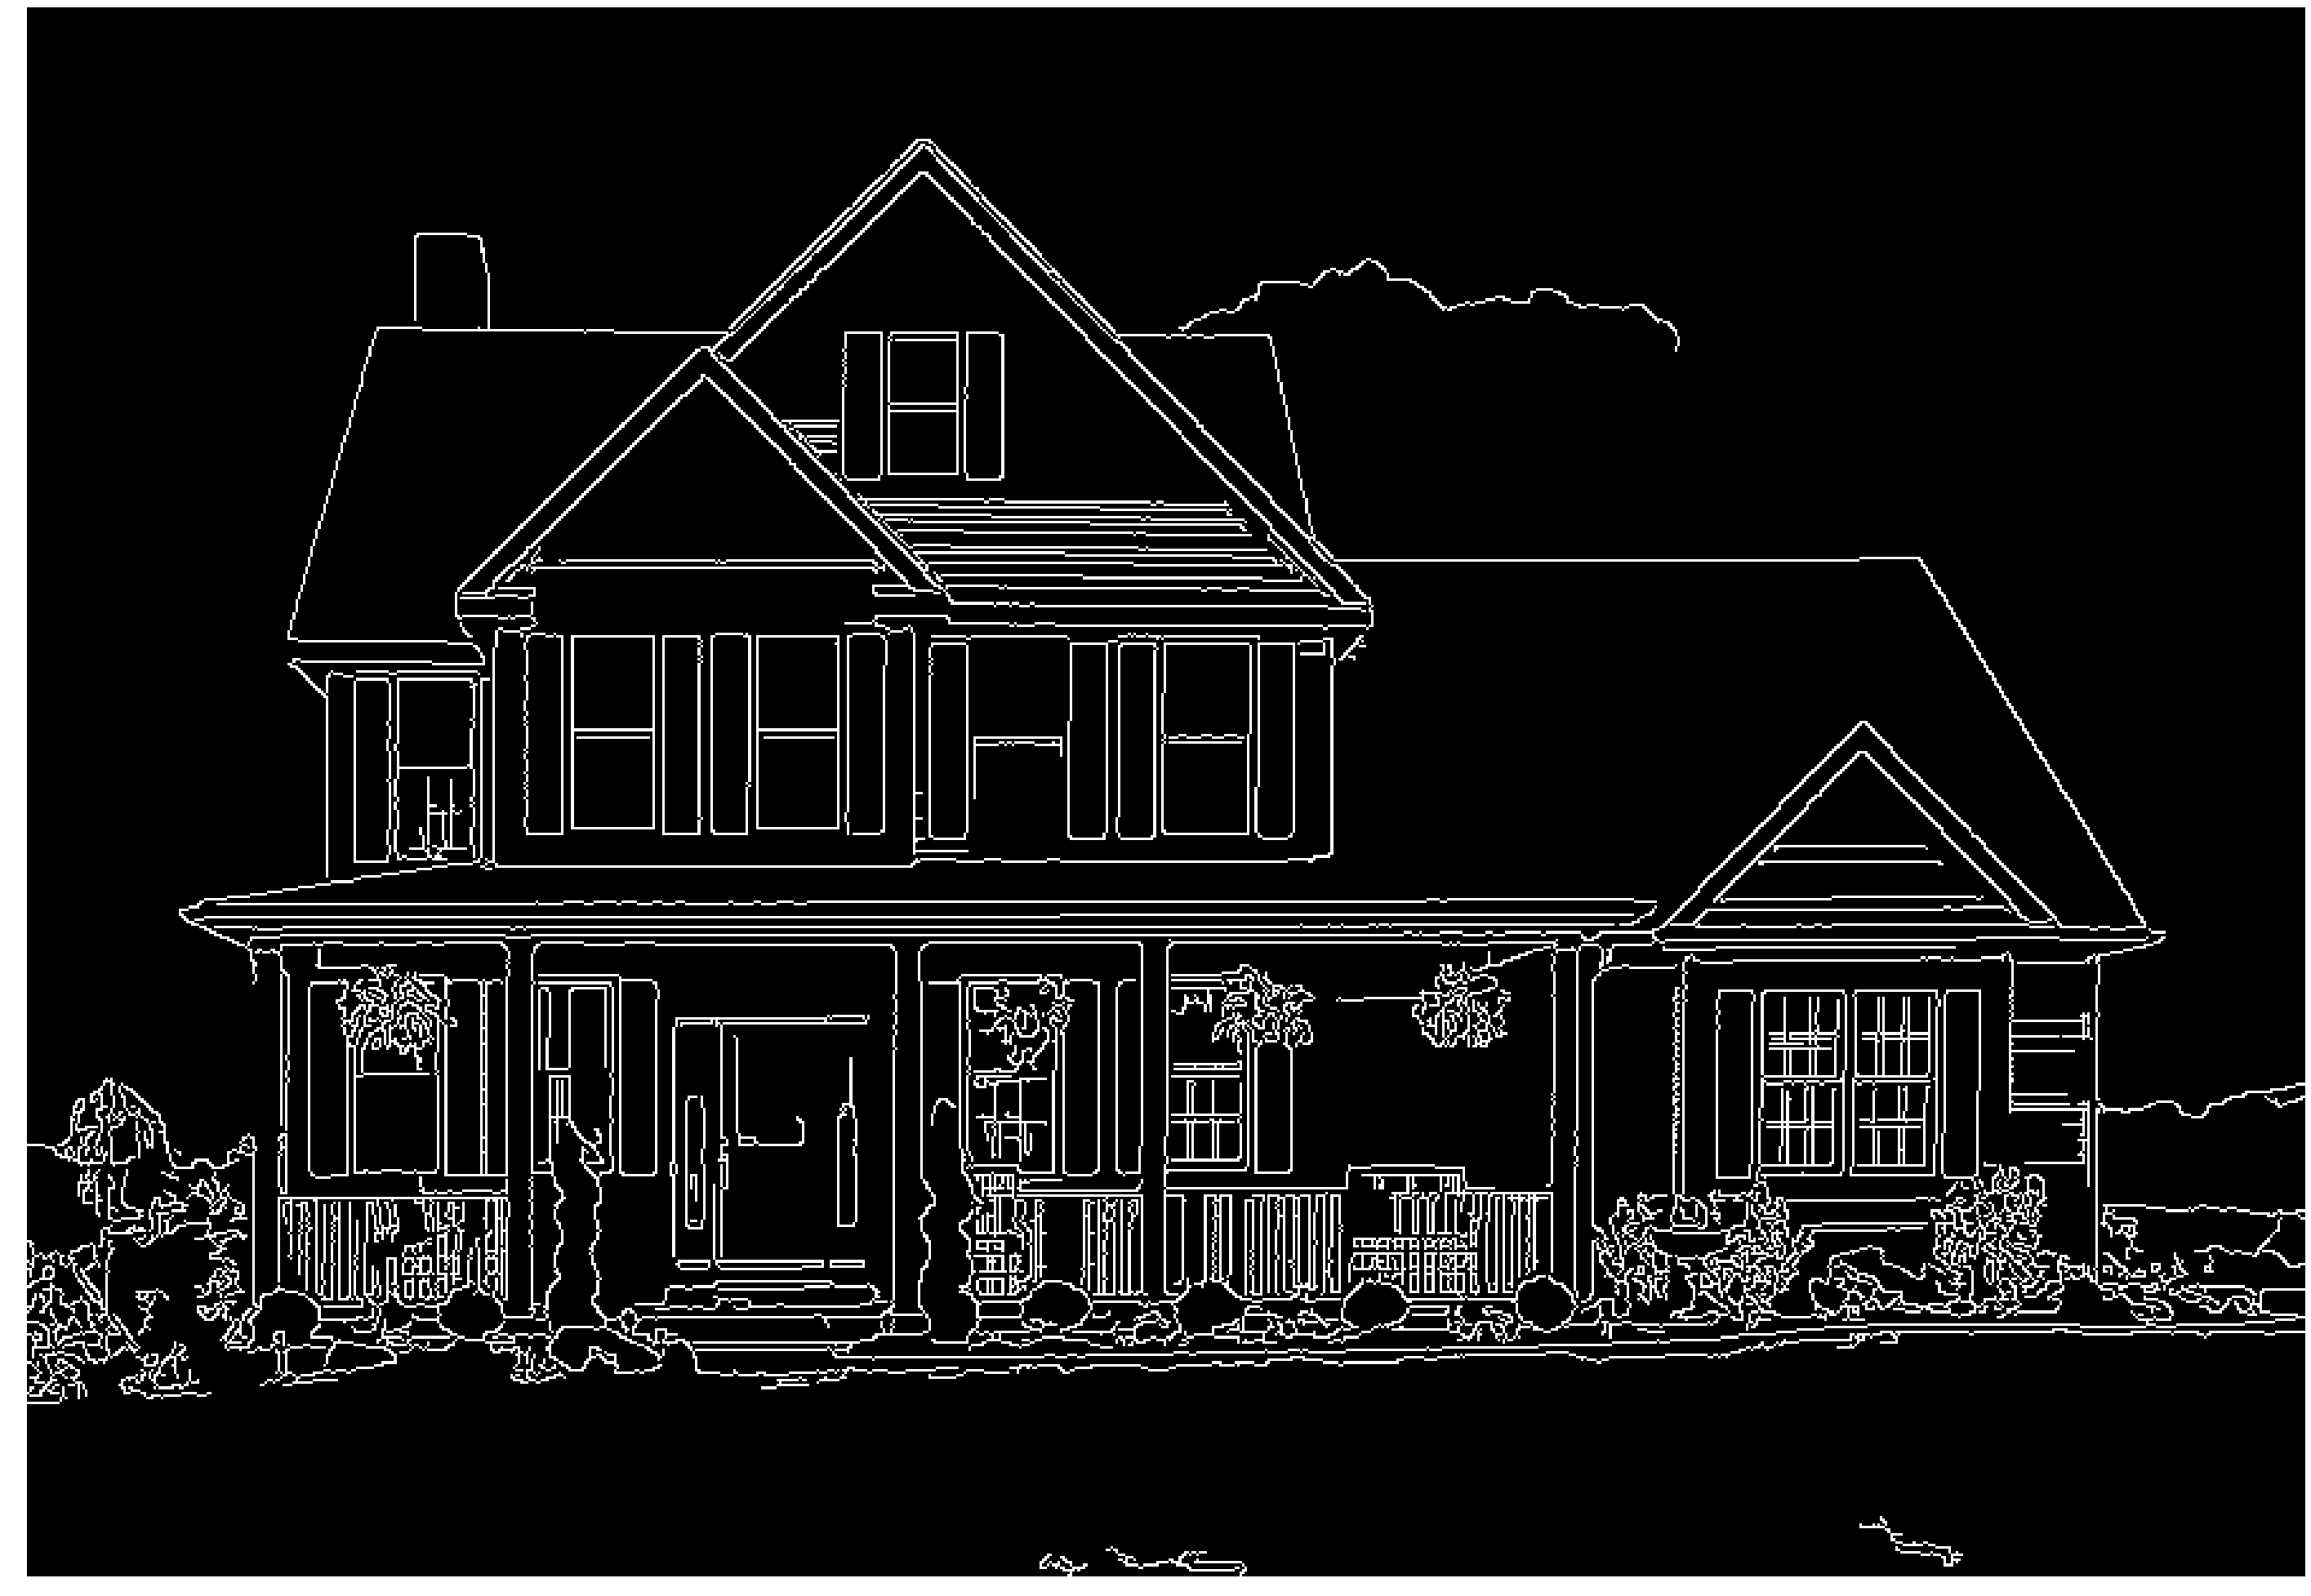

In [5]:
show(mid)

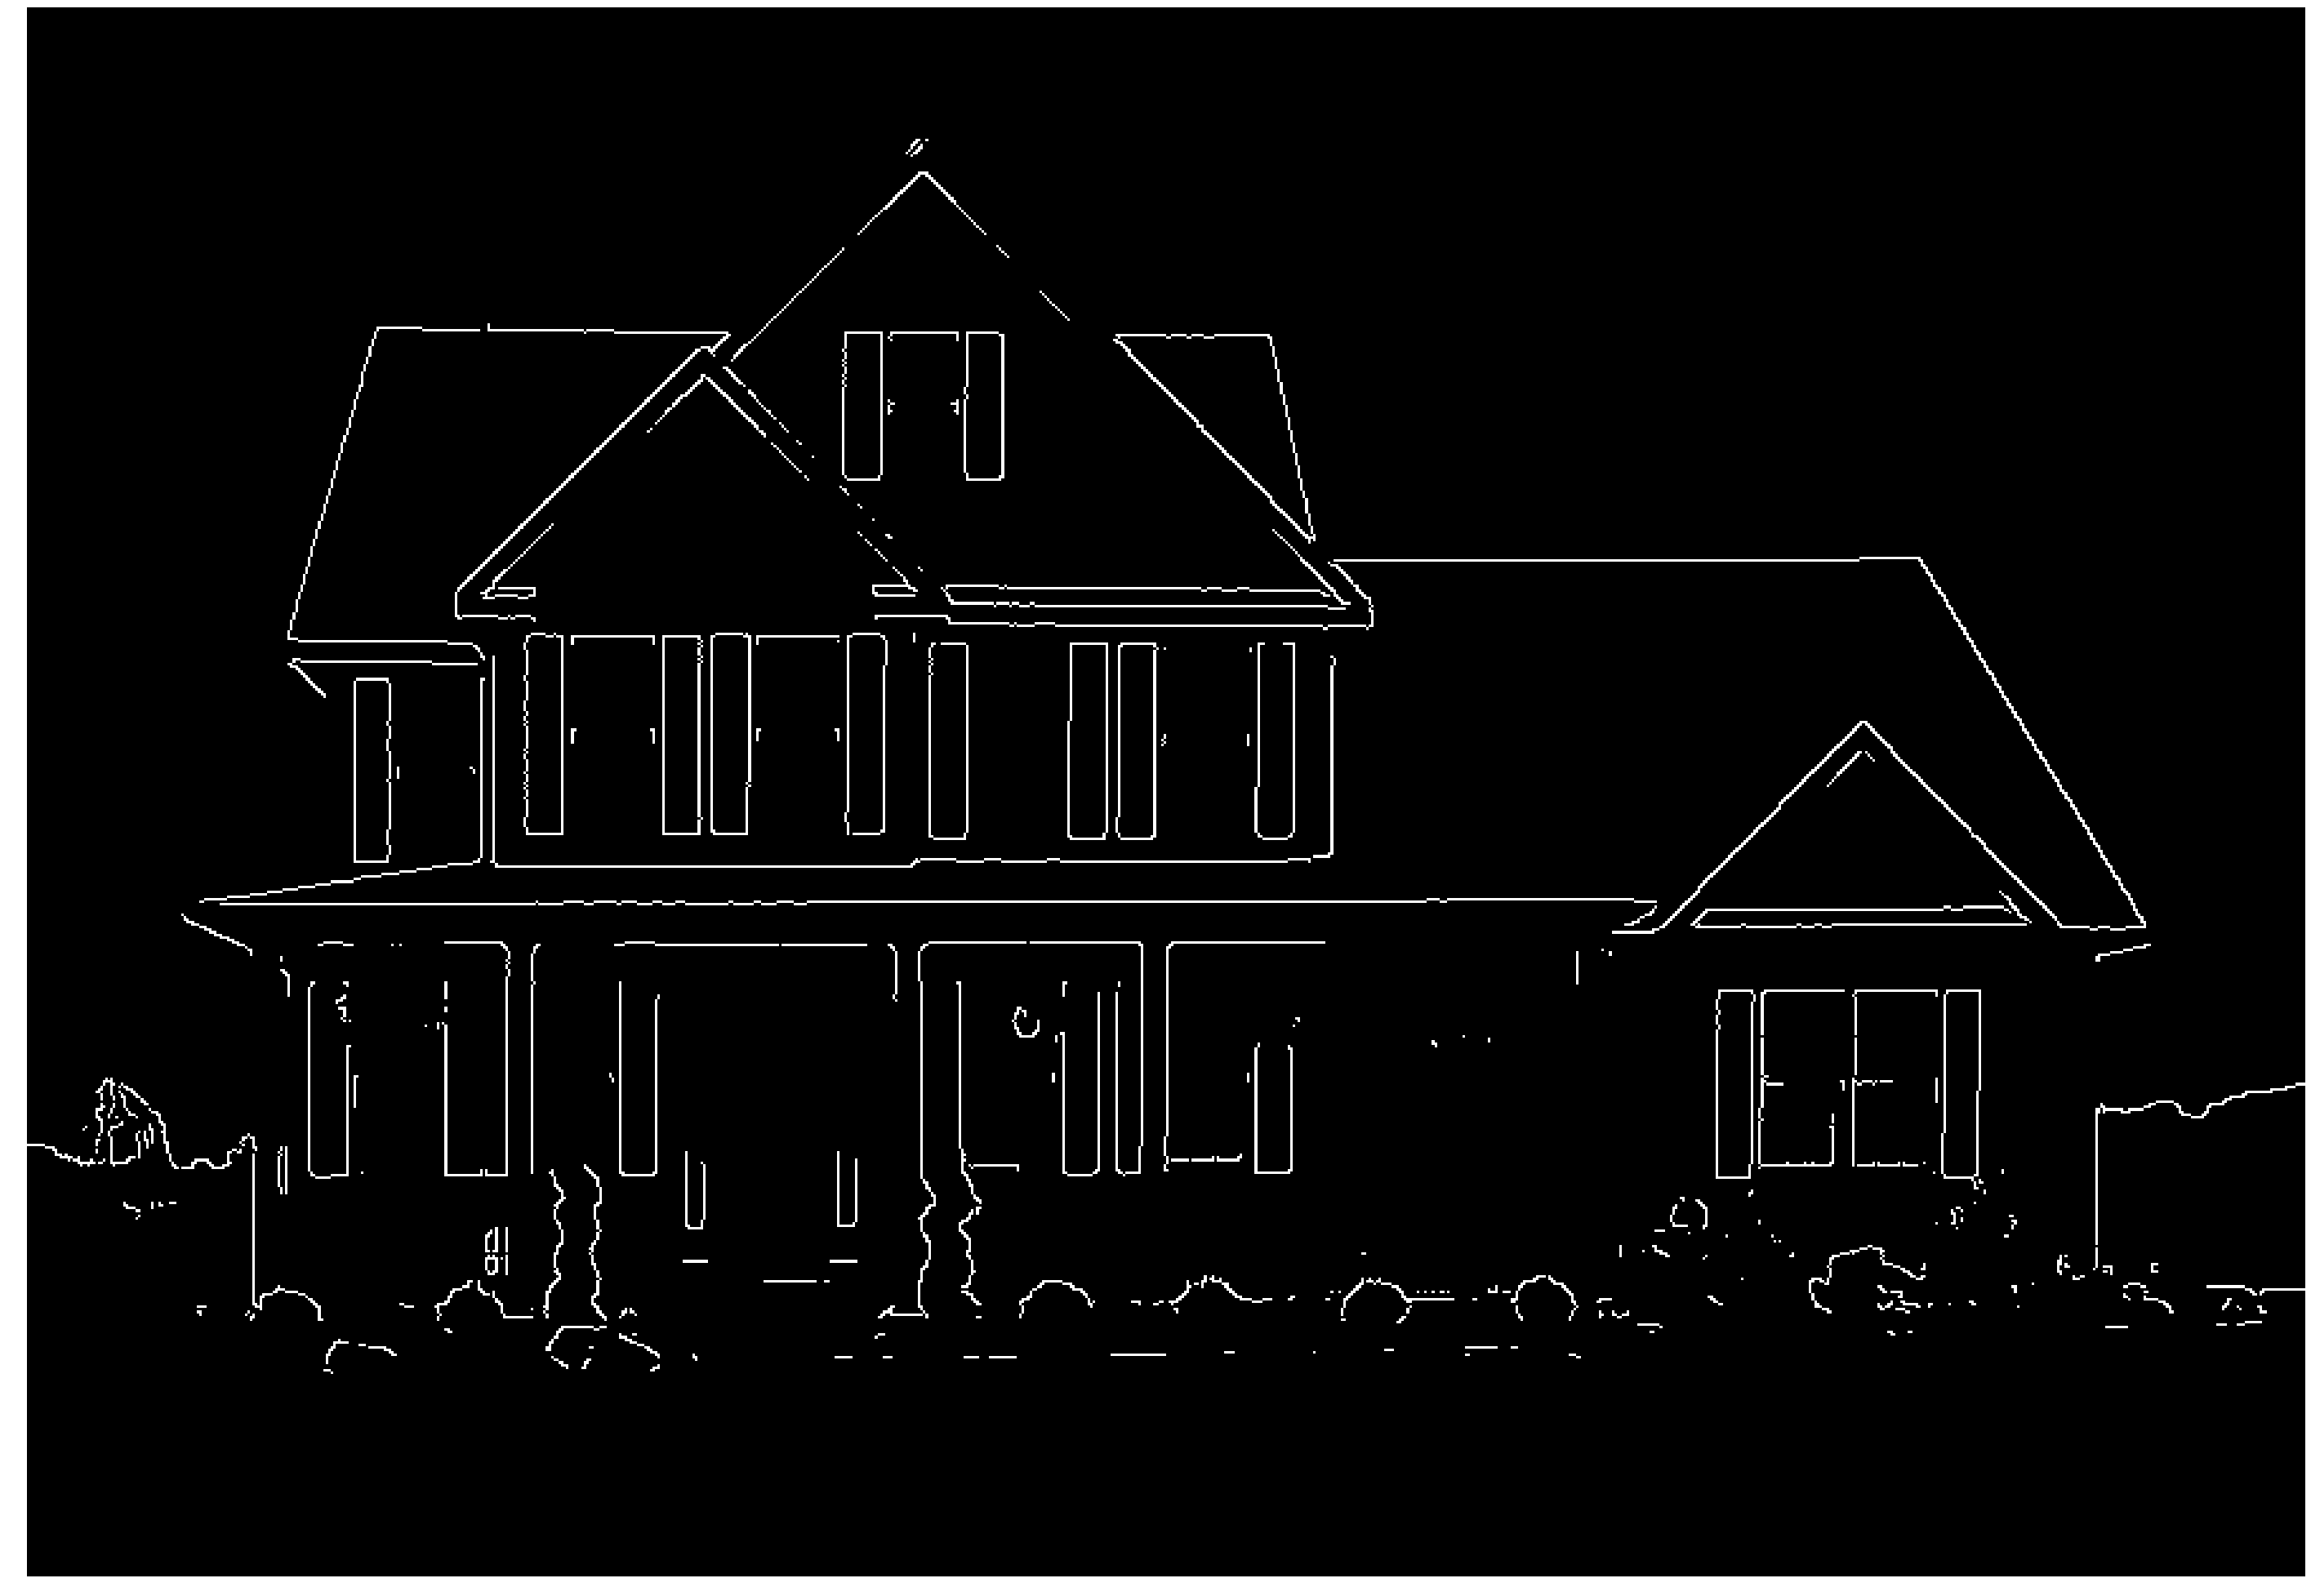

In [6]:
show(tight)

In [7]:
def auto_canny(image, sigma=0.33):
    """
    Calcula a mediana das intensidades de pixel de um único canal da imagem
    """

    v = np.median(image)
 
    # Aplicando a detecção automática de borda Canny usando a mediana calculada
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    edged = cv2.Canny(image, lower, upper)
 
    # Retorna a borda da imagem
    return edged

In [8]:
auto = auto_canny(blurred)

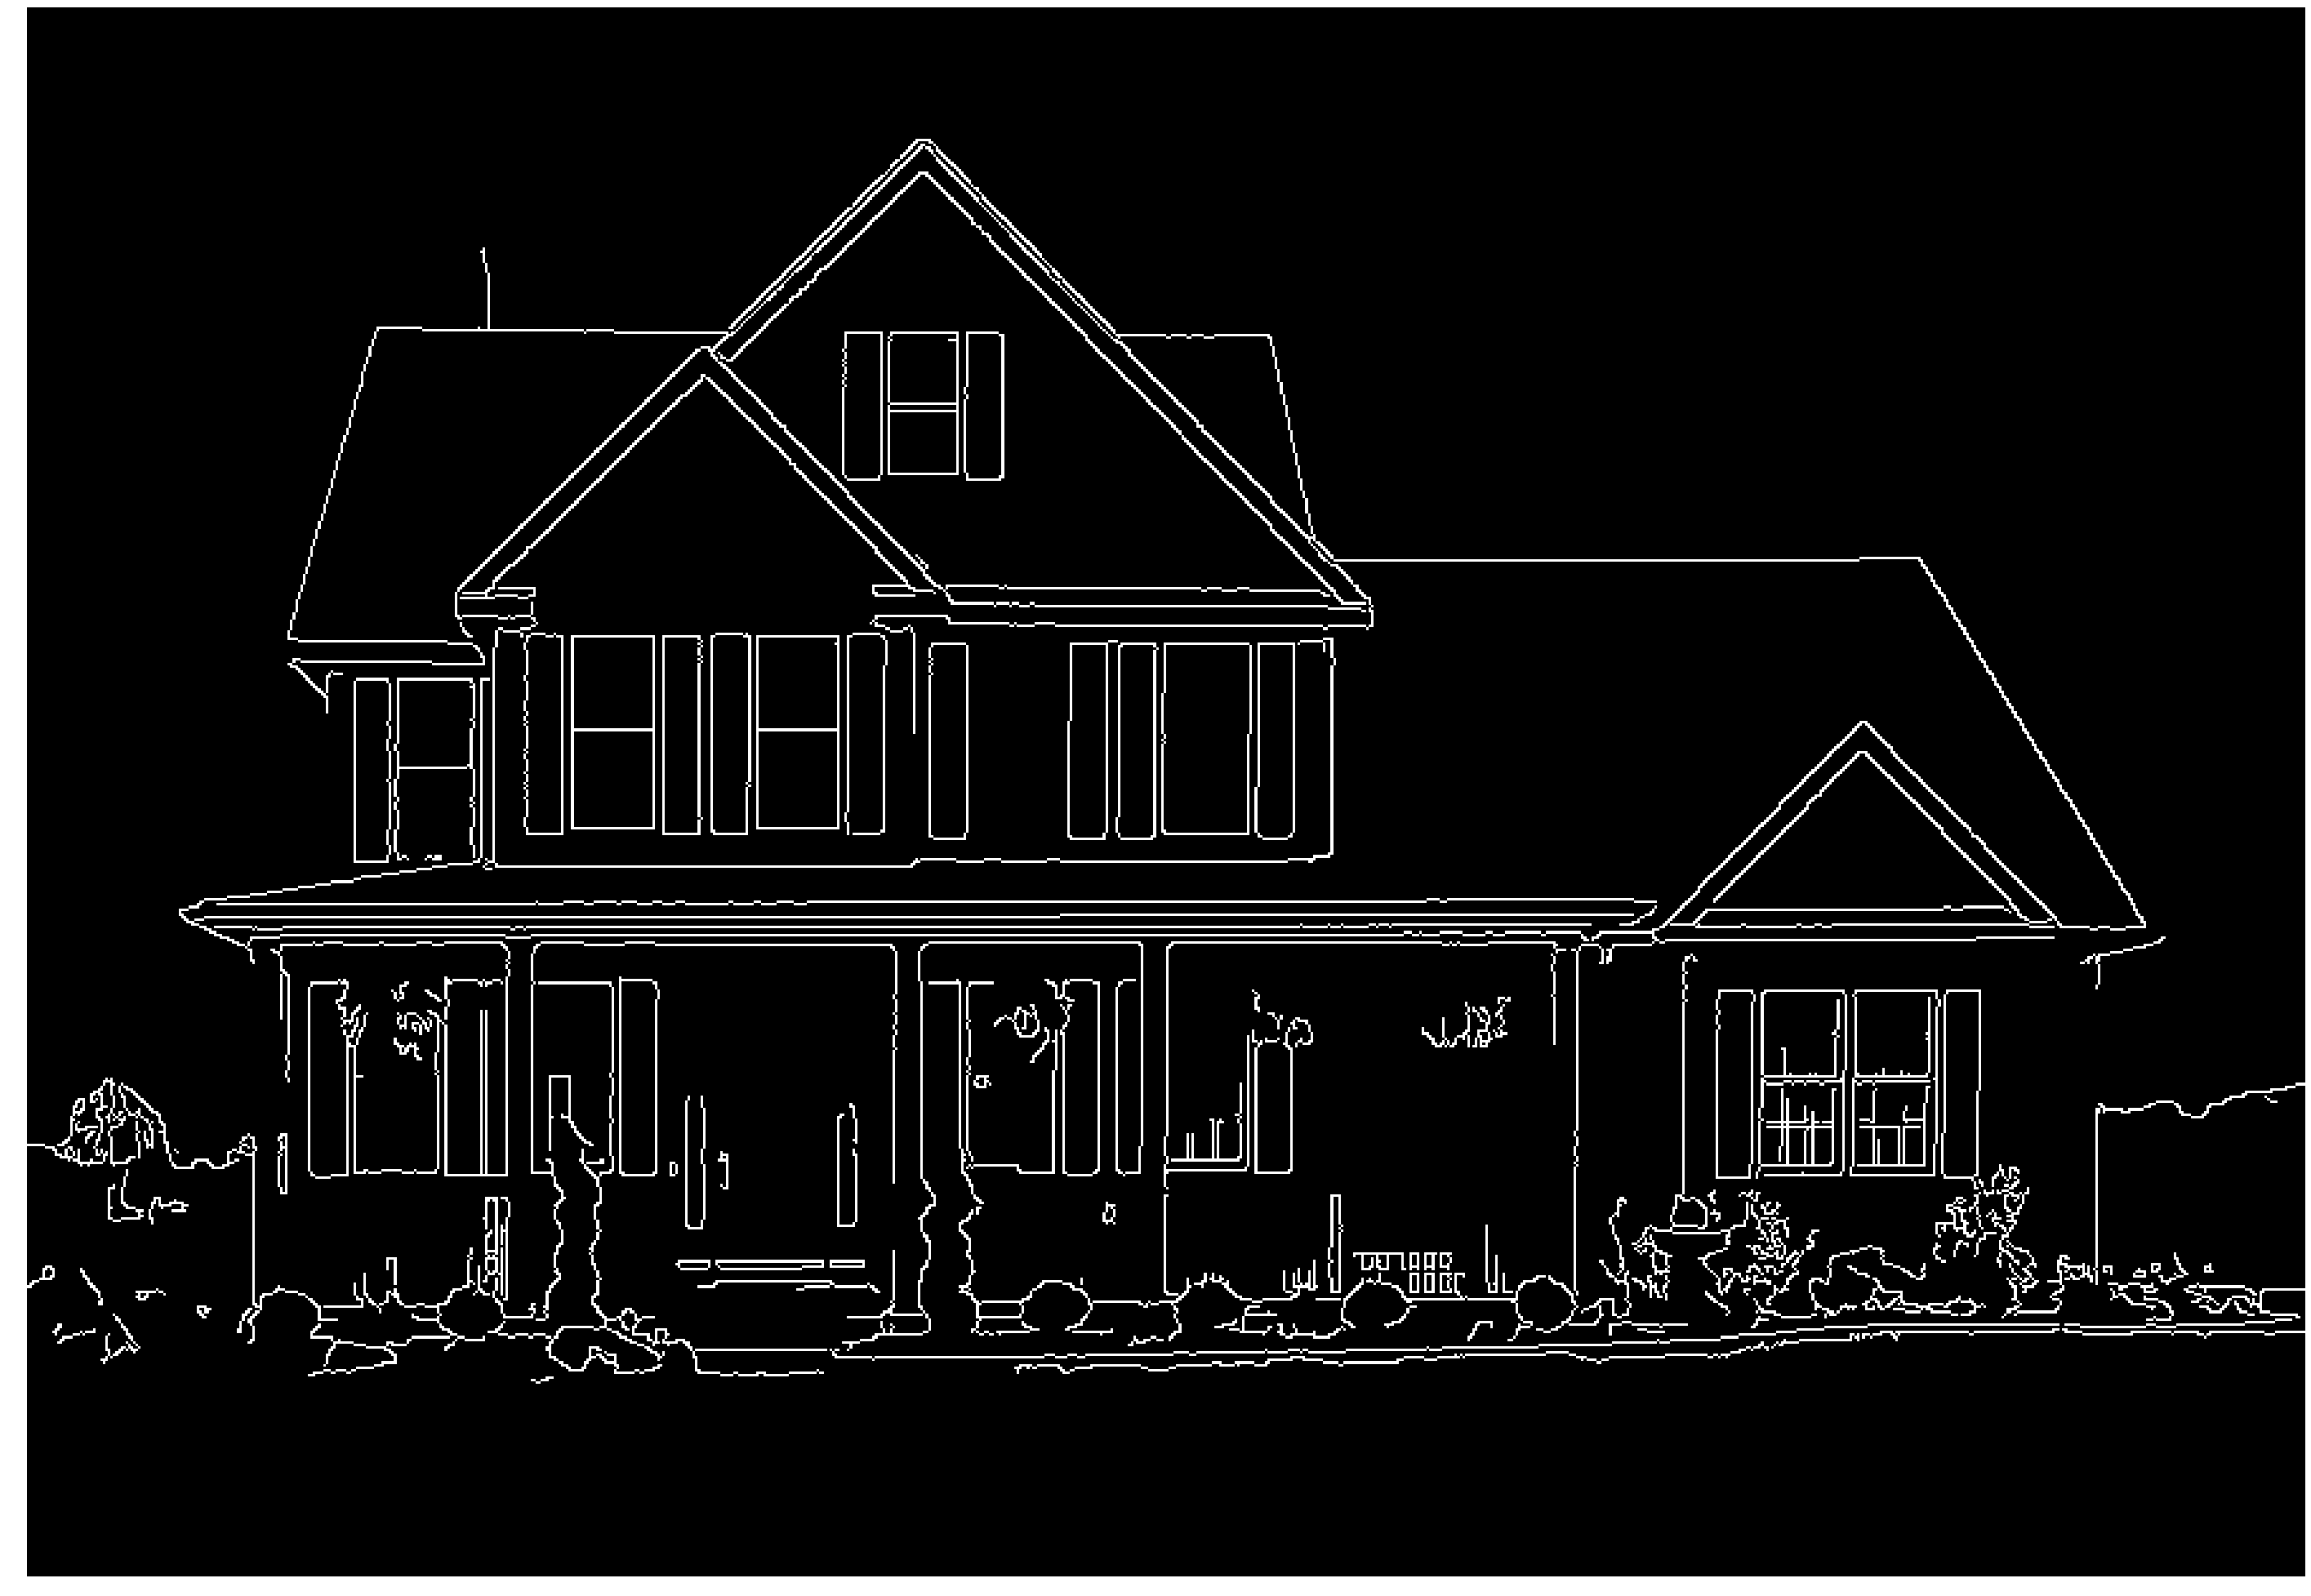

In [9]:
show(auto)